<a href="https://colab.research.google.com/github/Daffarr/Capstone-Project-HealPlant/blob/main/capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from PIL import Image 
from PIL import ImageEnhance
from skimage.io import imread
import matplotlib.pyplot as plt

import os, random, pathlib, warnings, itertools, math
warnings.filterwarnings("ignore")

import tensorflow as tf
import tensorflow.keras.backend as K
from sklearn.metrics import confusion_matrix

from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, LeakyReLU
from tensorflow.keras.layers import BatchNormalization, Activation, Conv2D 
from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dense, Dropout

In [2]:
!git clone https://github.com/Daffarr/Capstone-Project-HealPlant.git

Cloning into 'Capstone-Project-HealPlant'...
remote: Enumerating objects: 1766, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 1766 (delta 17), reused 33 (delta 9), pack-reused 1722
Receiving objects: 100% (1766/1766), 1.25 GiB | 17.65 MiB/s, done.
Resolving deltas: 100% (98/98), done.
Checking out files: 100% (1591/1591), done.


In [3]:
train_folder = '/content/Capstone-Project-HealPlant/Dataset/Train/Train'
test_folder = '/content/Capstone-Project-HealPlant/Dataset/Test/Test'
val_folder= '/content/Capstone-Project-HealPlant/Dataset/Validation/Validation'

In [4]:
def no_of_files(rootdir):
    for path in pathlib.Path(rootdir).iterdir():
        if path.is_dir():
            print("There are " + str(len([name for name in os.listdir(path) \
            if os.path.isfile(os.path.join(path, name))])) + " files in " + \
            str(path.name))
 
no_of_files(os.path.join(test_folder))

There are 50 files in Powdery
There are 50 files in Rust
There are 50 files in Healthy


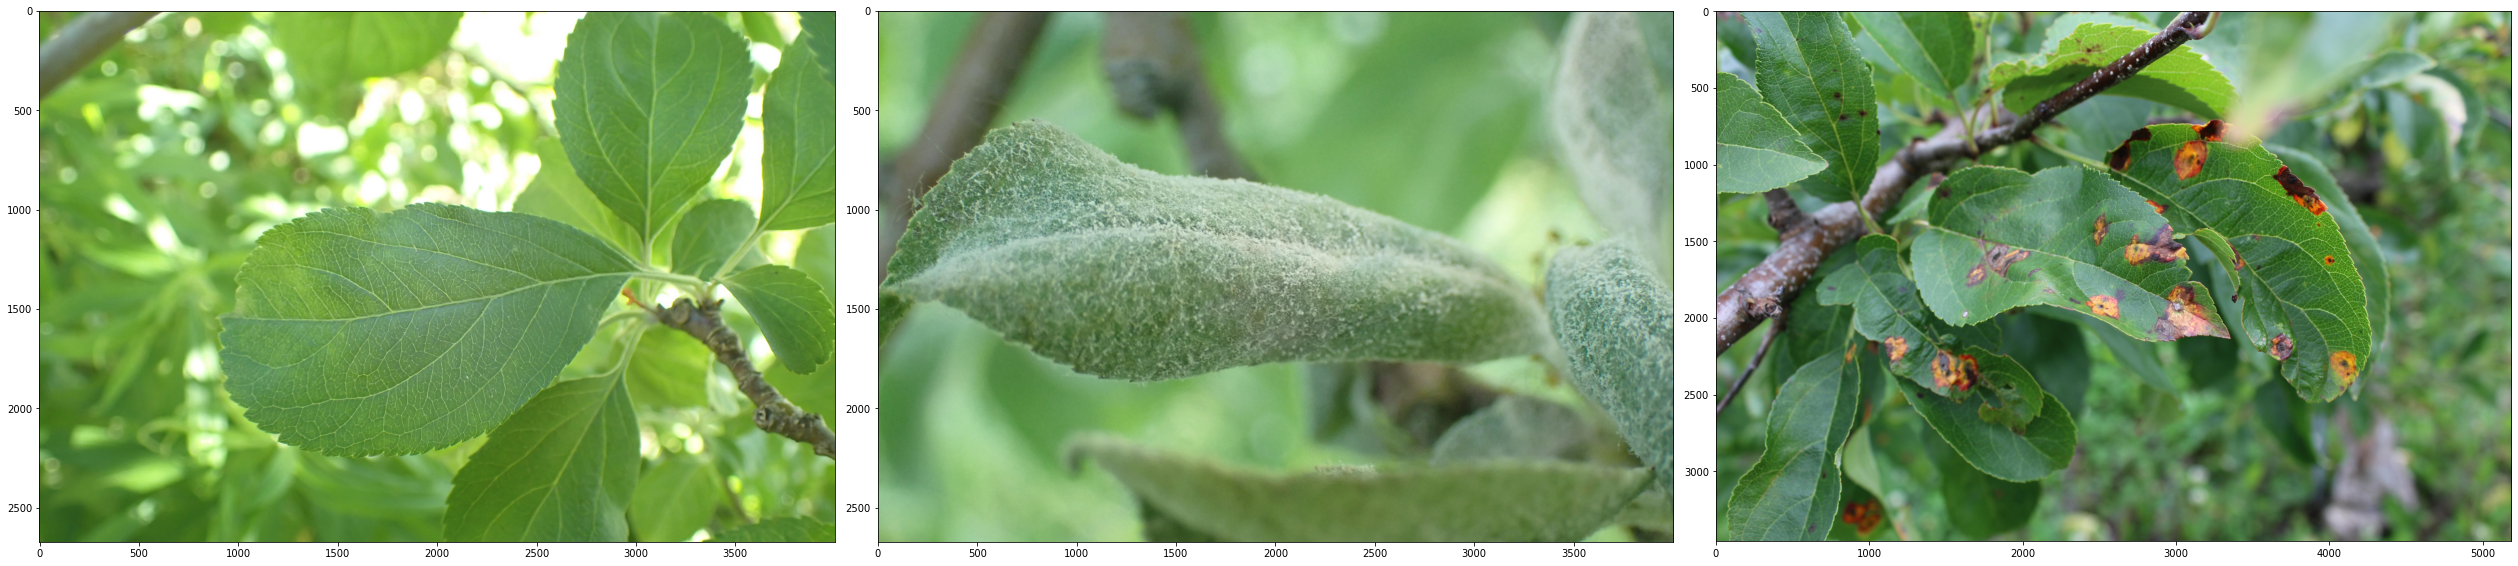

In [5]:
images = []

for selected_folder in sorted(os.listdir(train_folder)):
    cell = os.listdir(train_folder + '/' + selected_folder)
    folder_selected = np.random.choice(cell)
    images.append(os.path.join(train_folder,selected_folder,folder_selected))
                                     
fig=plt.figure(1, figsize=(70, 50))

for subplot,image_ in enumerate(images):
    category=image_.split('/')[-2]
    imgs = plt.imread(image_)
    a,b,c=imgs.shape
    fig=plt.subplot(6, 6, subplot+1)
    plt.imshow(imgs)
    
plt.tight_layout()

In [6]:
train_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)

In [7]:
training_set = train_datagen.flow_from_directory(
    train_folder,
    target_size = (224, 224),
    batch_size = 48,
    class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(
    test_folder, 
    target_size = (224, 224),
    batch_size = 48, 
    class_mode = 'categorical')

Found 1322 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [8]:
modelr=ResNet101V2(input_shape=(224,224,3),weights='imagenet',include_top=False)
for layer in modelr.layers:
    layer.trainable=False

171317808/171317808 [==============================] - 10s 0us/step


In [9]:
model=Sequential()
model.add(modelr)
model.add(Dropout(0.2))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(1024,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(512,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101v2 (Functional)    (None, 7, 7, 2048)        42626560  
                                                                 
 dropout (Dropout)           (None, 7, 7, 2048)        0         
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 batch_normalization (BatchN  (None, 100352)           401408    
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 1024)              102761472 
                                                                 
 batch_normalization_1 (Batc  (None, 1024)             4096      
 hNormalization)                                        

In [10]:
optimizer=tf.keras.optimizers.Adam(lr=0.001)
model.compile(
  loss='categorical_crossentropy',
  optimizer=optimizer,
  metrics=['accuracy']
)

In [11]:
history = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/15
28/28 [==============================] - 201s 7s/step - loss: 0.3691 - accuracy: 0.8744 - val_loss: 0.9534 - val_accuracy: 0.8667
Epoch 2/15
28/28 [==============================] - 182s 6s/step - loss: 0.0738 - accuracy: 0.9773 - val_loss: 0.5085 - val_accuracy: 0.8733
Epoch 3/15
28/28 [==============================] - 180s 6s/step - loss: 0.0340 - accuracy: 0.9894 - val_loss: 0.4576 - val_accuracy: 0.8867
Epoch 4/15
28/28 [==============================] - 179s 6s/step - loss: 0.0123 - accuracy: 0.9970 - val_loss: 0.3625 - val_accuracy: 0.9133
Epoch 5/15
28/28 [==============================] - 179s 6s/step - loss: 0.0087 - accuracy: 0.9992 - val_loss: 0.3282 - val_accuracy: 0.9133
Epoch 6/15
28/28 [==============================] - 180s 6s/step - loss: 0.0088 - accuracy: 0.9977 - val_loss: 0.3422 - val_accuracy: 0.9133
Epoch 7/15
28/28 [==============================] - 181s 6s/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.3545 - val_accuracy: 0.9067
Epoch 8/15
28

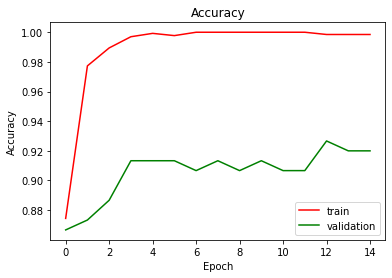

In [12]:
plt.plot(history.history['accuracy'],c='red')
plt.plot(history.history['val_accuracy'],c='green')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='lower right')

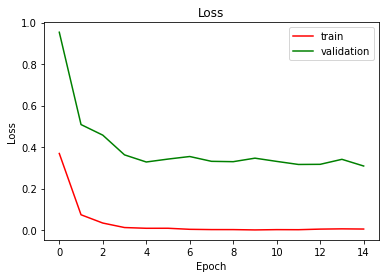

In [13]:
plt.plot(history.history['loss'],c='red')
plt.plot(history.history['val_loss'],c='green')
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='upper right')

In [14]:
model.evaluate(test_set)

4/4 [==============================] - 18s 4s/step - loss: 0.3088 - accuracy: 0.9200


[0.30879706144332886, 0.9200000166893005]

In [15]:
from tensorflow.keras.utils import load_img,img_to_array

In [16]:
dic=training_set.class_indices
icd={k:v for v,k in dic.items()}
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    predict_x=model.predict(test_set) 
    classes_x=np.argmax(predict_x,axis=1)
    print ('Predicted Class',icd[classes_x[0]])

4/4 [==============================] - 19s 4s/step
Predicted Class Rust


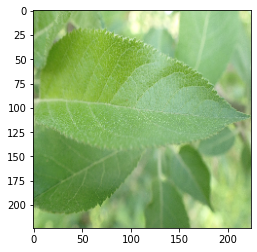

In [19]:
test_img='/content/Capstone-Project-HealPlant/Dataset/Test/Test/Healthy/8ddaac1bd6c8cd0a.jpg'
pic=load_img(test_img,target_size=(224,224,3))
plt.imshow(pic)
output(test_img)

In [20]:
import pickle

In [21]:
print("[INFO] Saving model...")
pickle.dump(model, open('capstone_model_healplant.pkl', 'wb'))

[INFO] Saving model...
